In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [2]:
# step 2 load the dataset
df_train = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
df_test = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Data Exploration 

In [3]:
missing_val = df_train.isnull().sum()
missing_val[missing_val > 0].sort_values(ascending =False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

**step 3.2 visualize the target variable(saleprice)**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


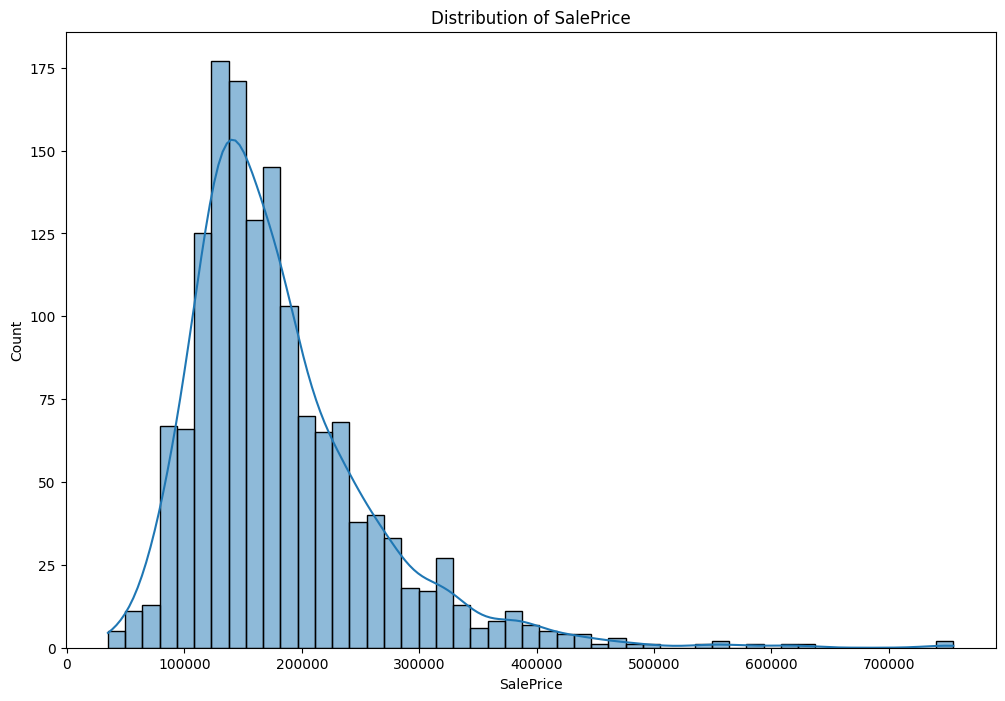

In [4]:
plt.figure(figsize=(12,8))
sns.histplot(df_train['SalePrice'],kde=True)
plt.title('Distribution of SalePrice')
plt.show()

**handle missing values **

In [5]:
# fill missing values for numerical columns with mean 
num_columns = df_train.select_dtypes(include=['int64','float64'])

df_train[num_columns.columns] = num_columns.fillna(num_columns.mean())

In [6]:
# fill missing values for categorical columns with the mode 
categorical_col = df_train.select_dtypes(include=['object'])
df_train[categorical_col.columns] = categorical_col.fillna(categorical_col.mode().iloc[0])
print(df_train.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


encode categorical variables

In [7]:
df_train = pd.get_dummies(df_train,drop_first=True)

****correlation heatmap****

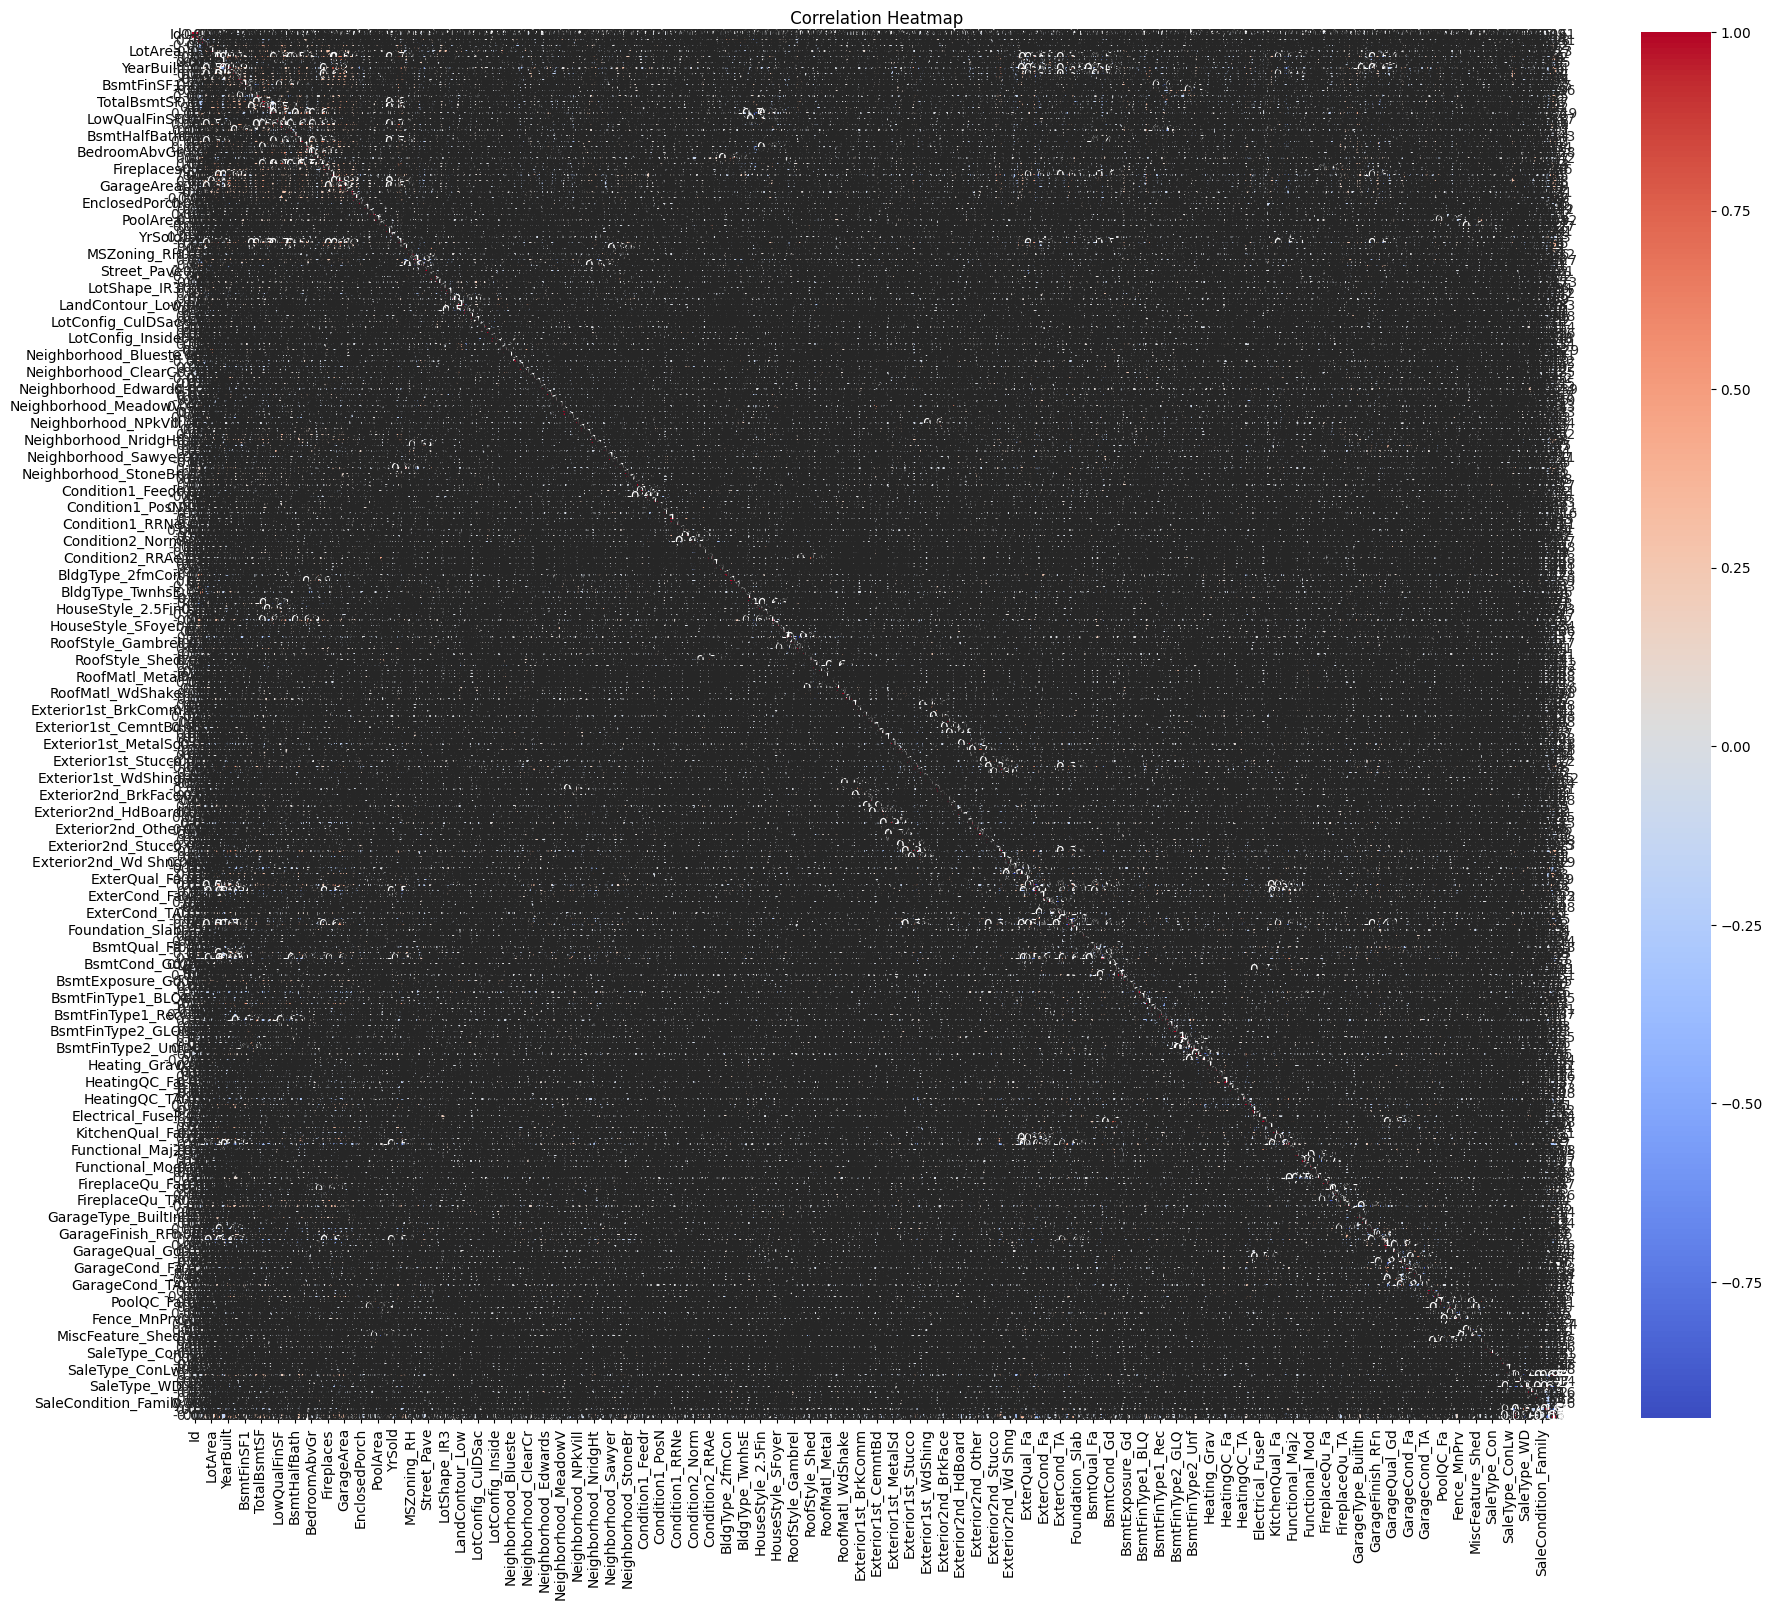

In [8]:
plt.figure(figsize=(22,18))
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(" Correlation Heatmap")
plt.show()

pairplot for key features 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

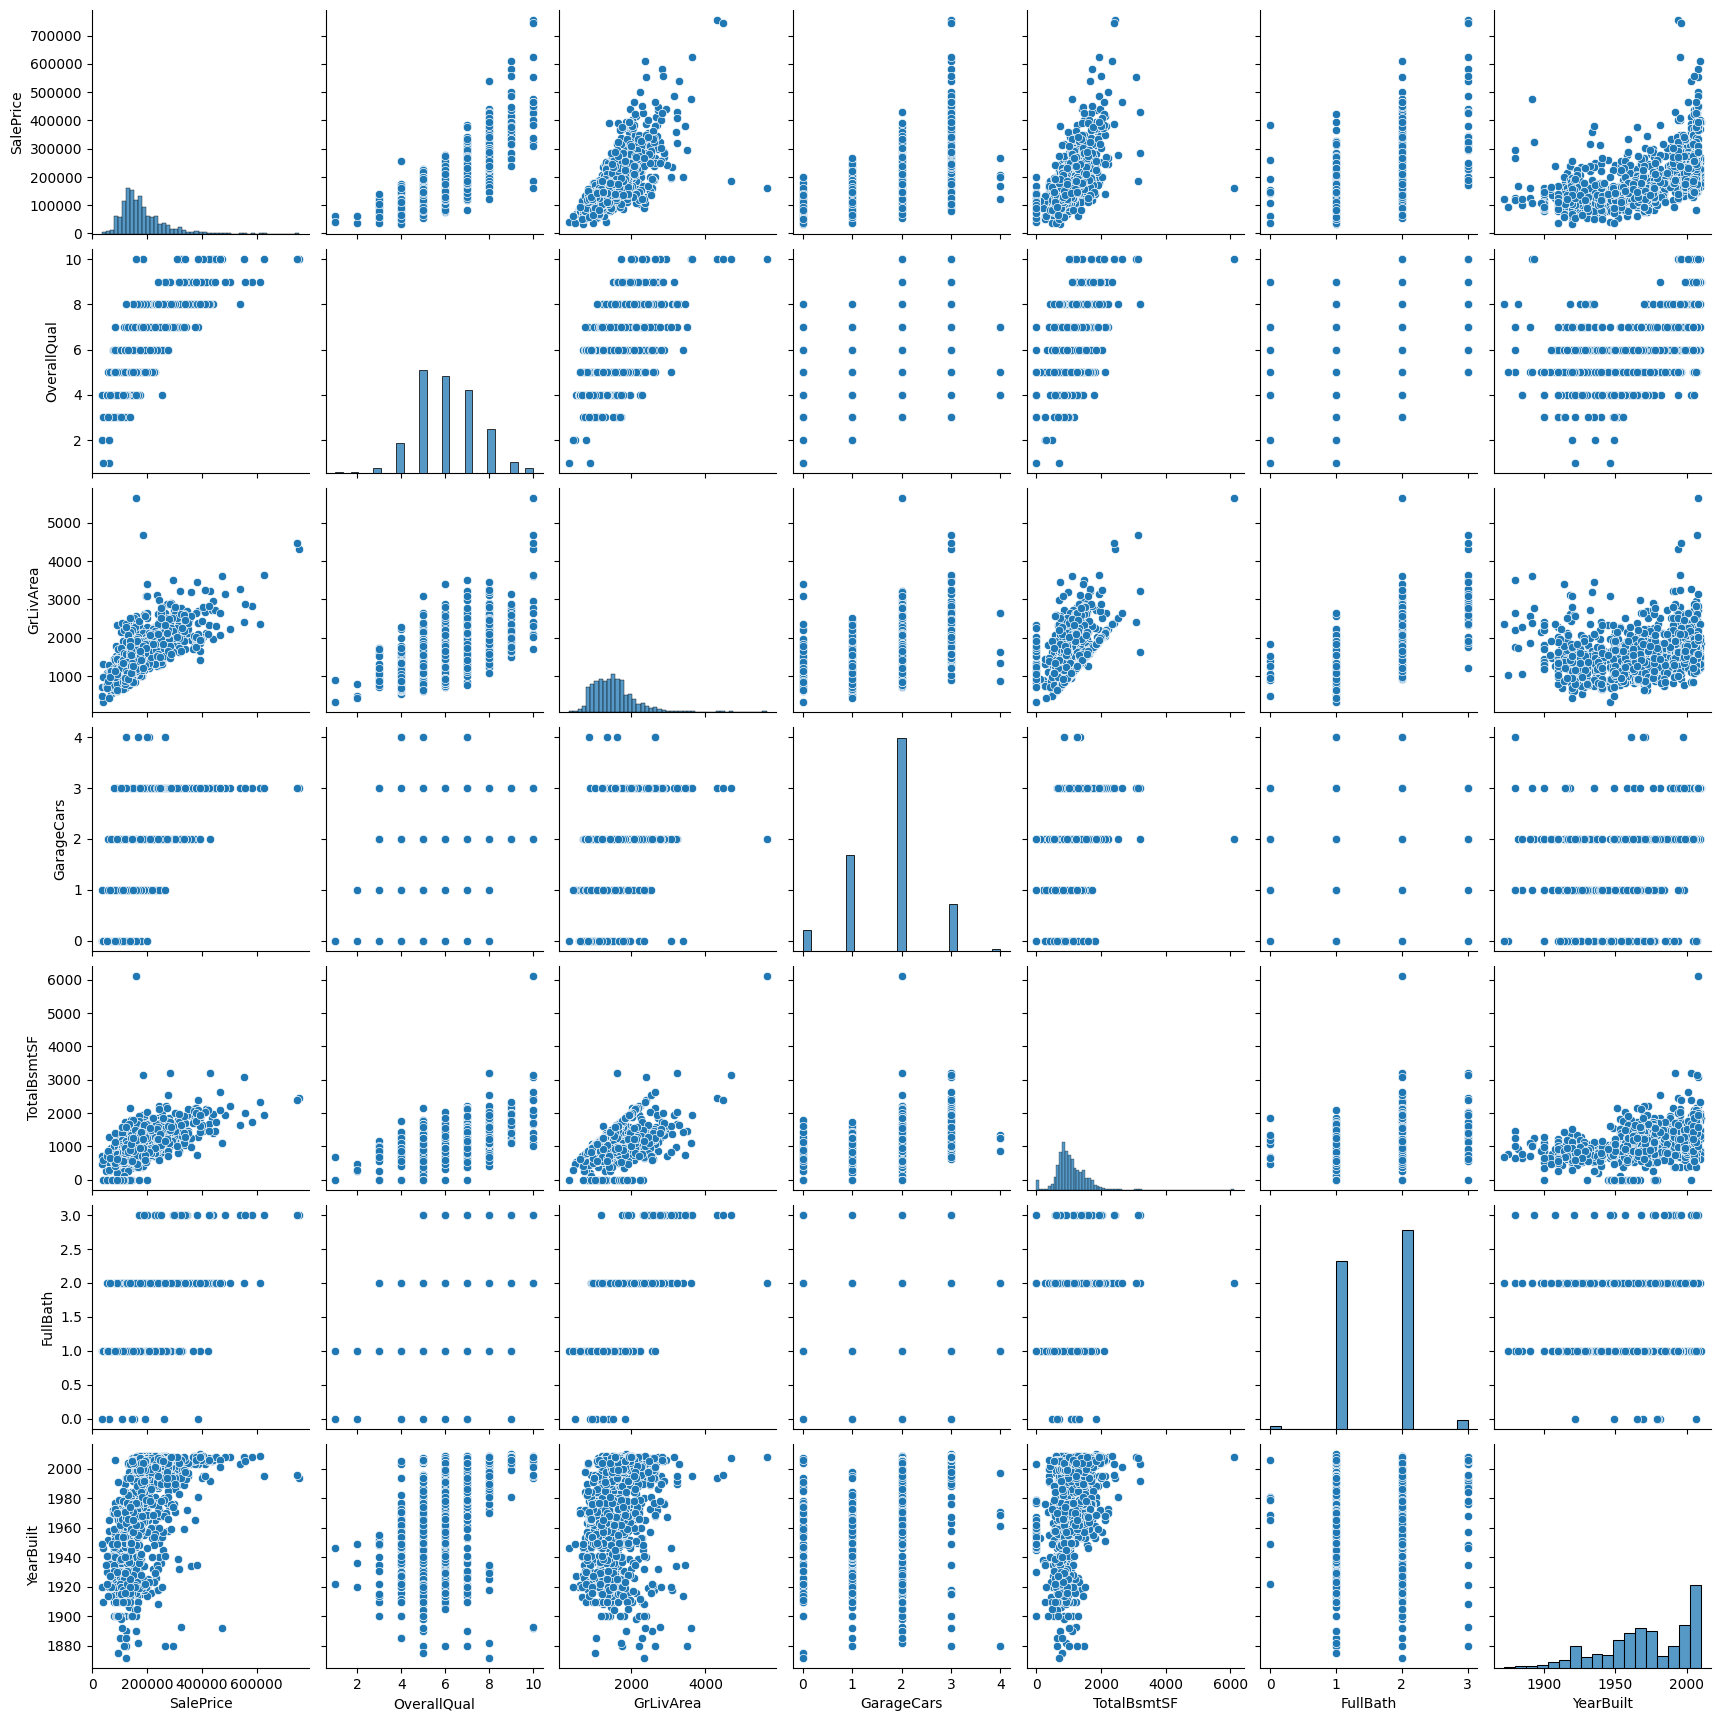

In [9]:
key_features=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[key_features])
plt.show()

seprate features and target variables 

In [10]:
X = df_train.drop('SalePrice', axis=1)
Y = df_train['SalePrice'] 

split the data into training and validation sets

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=42)

scale numerical features

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

train a model

In [13]:
# intialize the XGBoost Regressor
model = XGBRegressor(n_estimators=1000, learning_rate=0.05,random_state=42)
# train the model
model.fit(X_train,Y_train,early_stopping_rounds=5, eval_set=[(X_val, Y_val)], verbose=False)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

evalute the model

In [14]:
Y_pred = model.predict(X_val)
# calculate rmse
rmse = np.sqrt(mean_squared_error(Y_val, Y_pred))
print(f'validation RMSE: {rmse}')

validation RMSE: 26757.920747785258


prepare test for submission 

In [15]:
print(df_test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
test_ids = df_test['Id']

# Drop the 'Id' column for preprocessing
df_test = df_test.drop('Id', axis=1)

In [17]:
df_test = df_test.fillna(df_test.mode().iloc[0])

In [18]:
df_test = pd.get_dummies(df_test)

In [19]:
df_test = df_test.fillna(df_test.mean())

In [20]:
df_test = df_test.reindex(columns=X.columns, fill_value=0)

In [21]:
df_test = scaler.transform(df_test)

In [22]:
test_predictions = model.predict(df_test)

In [23]:

from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(Y_val, Y_pred)
print(f'R-squared (R²): {r2}')

R-squared (R²): 0.9066550361216874


In [24]:
# Define a tolerance (e.g., 10%)
tolerance = 0.10

# Calculate the percentage of predictions within the tolerance
within_tolerance = np.abs((Y_pred - Y_val) / Y_val) <= tolerance
accuracy = np.mean(within_tolerance) * 100

print(f'Percentage of predictions within {tolerance * 100}% of actual values: {accuracy:.2f}%')

Percentage of predictions within 10.0% of actual values: 67.81%


****> crate submission file> 

In [25]:
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_predictions
})
submission.to_csv('submission.csv', index=False)

In [26]:
print(submission.head())

     Id      SalePrice
0  1461  127731.257812
1  1462  155192.343750
2  1463  181387.015625
3  1464  190275.156250
4  1465  197486.671875
